In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from collab.foraging.toolkit import (
    dataObject,
    generate_local_windows,
    generate_nextStep_score,
    generate_nextStepExponential_score,
    plot_predictor,
    rescale_to_grid,
    subsample_frames_constant_frame_rate,
)

In [2]:
# load data
fish_data = pd.read_csv("4wpf_test.csv")
gridMin = 0
gridMax = 300
grid_size = 50
fps = 121

# scaling and subsampling
fishDF_scaled = rescale_to_grid(
    fish_data, size=grid_size, gridMin=gridMin, gridMax=gridMax
)
fishDF_scaled_subsampled = subsample_frames_constant_frame_rate(
    fishDF_scaled, frame_spacing=121
)

# create a test foragers object with 10 frames
num_frames = 10
foragers_object = dataObject(
    fishDF_scaled_subsampled.loc[fishDF_scaled_subsampled["time"] < num_frames],
    grid_size=grid_size,
)

# get local windows
local_windows_kwargs = {
    "window_size": 15,
    "sampling_fraction": 1,
    "skip_incomplete_frames": True,
}

foragers_object.local_windows_kwargs = local_windows_kwargs

local_windows = generate_local_windows(foragers_object)
foragers_object.local_windows = local_windows

original_frames: 18739
original_shape: (74956, 5)
resulting_frames: 155
resulting_shape: (620, 5)


/Users/palka/Documents/Repositories/collab-creatures/collab/foraging/toolkit/utils.py:42: UserWarning: 
                NaN values in data. The default behavior of predictor/score generating functions is
                to ignore foragers with missing positional data. To modify, see documentation of
                `derive_predictors_and_scores` and `generate_local_windows`
                
  warnings.warn(


# Generate sublinear and exponential nextStep scores

In [10]:
score_kwargs = {
    "nextStep_sublinear": {"nonlinearity_exponent": 0.5},
    "nextStepExponential": {"decay_length": 5},
}

foragers_object.score_kwargs = score_kwargs

nextStep_sublinear = generate_nextStep_score(
    foragers_object,
    score_name="nextStep_sublinear",
)
# convert to DF
nextStep_sublinearDF = pd.concat([pd.concat(dfs) for dfs in nextStep_sublinear])

nextStep_exp = generate_nextStepExponential_score(
    foragers_object,
    score_name="nextStepExponential",
)
# convert to DF
nextStep_expDF = pd.concat([pd.concat(dfs) for dfs in nextStep_exp])

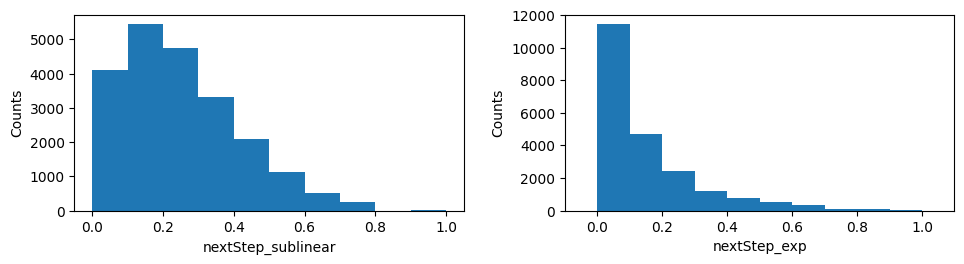

In [11]:
# plot distribution of scores
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

ax[0].hist(nextStep_sublinearDF["nextStep_sublinear"])
ax[0].set_xlabel("nextStep_sublinear")
ax[0].set_ylabel("Counts")

ax[1].hist(nextStep_expDF["nextStepExponential"])
ax[1].set_xlabel("nextStep_exp")
ax[1].set_xlim([-0.1, 1.1])
ax[1].set_ylabel("Counts")

fig.tight_layout(pad=2)

# Visualize on the grid

/Users/palka/Documents/Repositories/collab-creatures/collab/foraging/toolkit/visualization.py:100: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


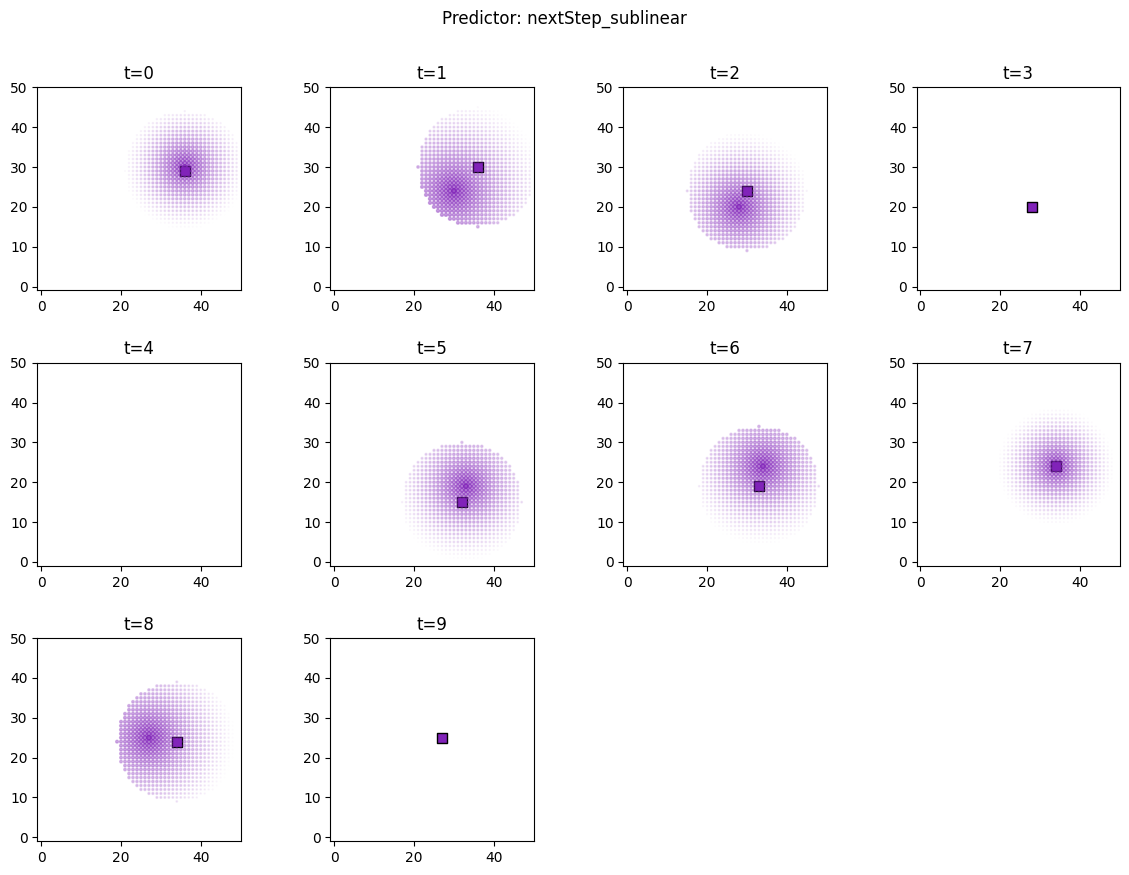

In [12]:
# visualize on the grid
plot_predictor(
    foragers_object.foragers,
    nextStep_sublinear,
    "nextStep_sublinear",
    forager_position_indices=[3],
    forager_predictor_indices=[3],
    time=range(num_frames),
    grid_size=grid_size,
    size_multiplier=10,
    random_state=99,
)

/Users/palka/Documents/Repositories/collab-creatures/collab/foraging/toolkit/visualization.py:100: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


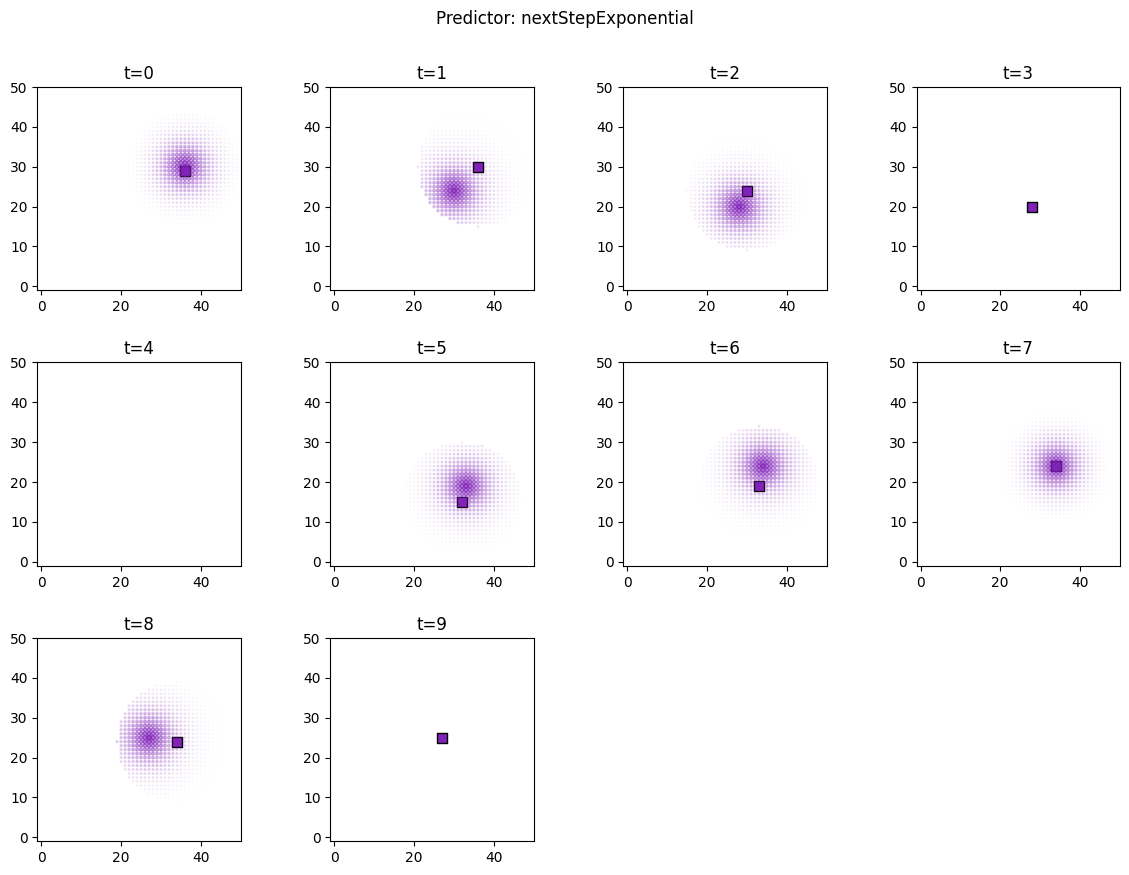

In [13]:
plot_predictor(
    foragers_object.foragers,
    nextStep_exp,
    "nextStepExponential",
    forager_position_indices=[3],
    forager_predictor_indices=[3],
    time=range(num_frames),
    grid_size=grid_size,
    size_multiplier=10,
    random_state=99,
)